# Imports

In [34]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset 

In [46]:
data = pd.read_csv('cleaned_dataset.csv')

C:\Users\ROG\AppData\Local\Temp\ipykernel_8352\1410160792.py:1: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,41,42,43,44,45,46,47,48,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_dataset.csv')


# Select relevant categorical columns for pattern mining

In [36]:
columns_of_interest = ['Category', 'Free', 'Content Rating', 'Ad Supported', 'In app purchases', 'Editor Choice']

# Create a list of transactions

In [37]:
transactions = []
for _, row in data.iterrows():
    transaction = []
    for col in columns_of_interest:
        transaction.append(f"{col}={row[col]}")
    transactions.append(transaction)

# Use TransactionEncoder to transform the list of transactions into a one-hot encoded DataFrame

In [38]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the transformed DataFrame
print("Transformed Data:")
print(df.head())

Transformed Data:
   Ad Supported=True  Ad Supported=nan  Category=0.0  Category=1.0  \
0               True             False         False         False   
1               True             False         False         False   
2               True             False         False         False   
3               True             False         False         False   
4               True             False         False         False   

   Category=1.06  Category=1.0625  Category=1.0654205  Category=1.069307  \
0          False            False               False              False   
1          False            False               False              False   
2          False            False               False              False   
3          False            False               False              False   
4          False            False               False              False   

   Category=1.0714285  Category=1.0909091  ...  Free=9.9  Free=9.95  \
0               False            

# Apply the Apriori algorithm to find frequent itemsets

In [39]:
frequent_itemsets = apriori(df, min_support=0.7, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                                           itemsets
0   0.852162                          (Content Rating=Everyone)
1   0.998272                              (Editor Choice=False)
2   0.935996                                         (Free=0.0)
3   0.791676                           (In app purchases=False)
4   0.851147     (Content Rating=Everyone, Editor Choice=False)
5   0.795389                (Content Rating=Everyone, Free=0.0)
6   0.934352                    (Free=0.0, Editor Choice=False)
7   0.791355      (Editor Choice=False, In app purchases=False)
8   0.733936                 (Free=0.0, In app purchases=False)
9   0.794404  (Editor Choice=False, Content Rating=Everyone,...
10  0.733674  (Free=0.0, Editor Choice=False, In app purchas...


# Extract association rules from the frequent itemsets


In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
                           antecedents                          consequents  \
0            (Content Rating=Everyone)                (Editor Choice=False)   
1                (Editor Choice=False)            (Content Rating=Everyone)   
2                (Editor Choice=False)             (In app purchases=False)   
3             (In app purchases=False)                (Editor Choice=False)   
4  (Content Rating=Everyone, Free=0.0)                (Editor Choice=False)   
5                (Editor Choice=False)  (Content Rating=Everyone, Free=0.0)   
6   (Free=0.0, In app purchases=False)                (Editor Choice=False)   
7                (Editor Choice=False)   (Free=0.0, In app purchases=False)   

    support  confidence      lift  
0  0.851147    0.998808  1.000538  
1  0.851147    0.852620  1.000538  
2  0.791355    0.792725  1.001325  
3  0.791355    0.999594  1.001325  
4  0.794404    0.998762  1.000491  
5  0.794404    0.795779  1.000491  
6  0.733674    0.

In [41]:
# # Convert DataFrame to CSV string and then save
# frequent_itemsets_csv = frequent_itemsets.to_csv(index=False)
# with open('frequent_itemsets.csv', 'w', encoding='utf-8') as f:
#     f.write(frequent_itemsets_csv)

# rules_csv = rules.to_csv(index=False)
# with open('association_rules.csv', 'w', encoding='utf-8') as f:
#     f.write(rules_csv)

# Section 2

In [91]:
data = pd.read_csv('cleaned_dataset.csv')
def convert_size(size_str):
    if ',' in size_str:
        size_str = size_str.replace(',', '.')
    if 'M' in size_str:
        return float(size_str.replace('M', '')) * 1e6
    elif 'k' in size_str:
        return float(size_str.replace('k', '')) * 1e3
    else:
        return np.nan

data['Size'] = data['Size'].apply(convert_size)
data = data.dropna(subset=[
    'Rating', 'Rating Count', 'Installs', 'Size', 'Content Rating', 'In app purchases', 'Category', 'Free', 'Ad Supported'
])

C:\Users\ROG\AppData\Local\Temp\ipykernel_8352\1887987569.py:1: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,41,42,43,44,45,46,47,48,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_dataset.csv')


In [100]:
# Step 3: Feature selection
features = ['Rating', 'Rating Count', 'Installs', 'Size', 'In app purchases', 'Category']  # Add or remove features as necessary
X = data[features]


In [101]:
# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
# Step 5: K-means clustering
# Determine the optimal number of clusters using the Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

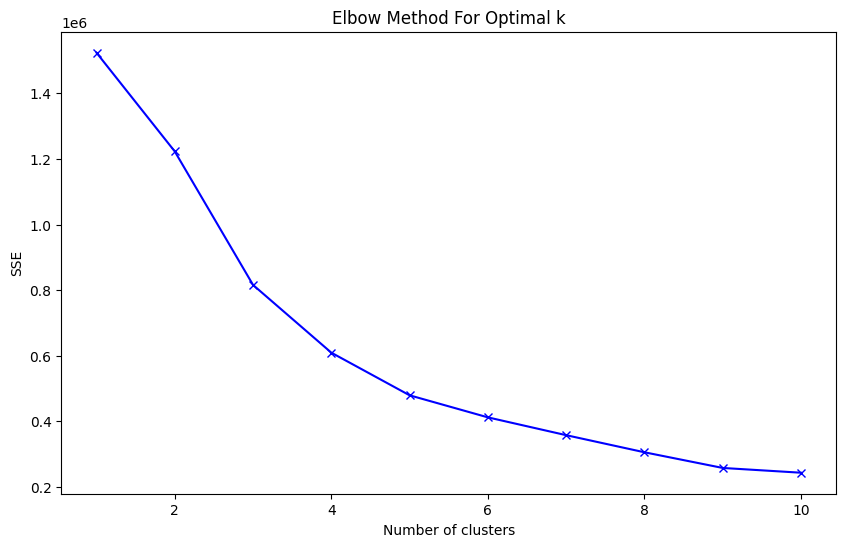

In [103]:
# Plot the Elbow method result
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: '1.014k'

In [21]:
# 2. Preprocess the data (example steps, adjust according to your dataset)
# Assuming numerical data for simplicity; adjust preprocessing as needed
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('cleaned_dataset.csv')
for col in df.columns:
    if df[col].dtype != "float64":
        df.drop(col, axis=1, inplace=True)

C:\Users\ROG\AppData\Local\Temp\ipykernel_8352\2995333492.py:6: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,41,42,43,44,45,46,47,48,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_dataset.csv')


In [23]:
# dataset = df.iloc[:,[1,2]].values
# df = df.iloc[:,[2, 5, 7, 8, 17, 19]].values
# print(df.iloc[11:13,[2, 3, 4, 5, 6, 7]].values)

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)
        
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)



In [24]:
# 3. Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

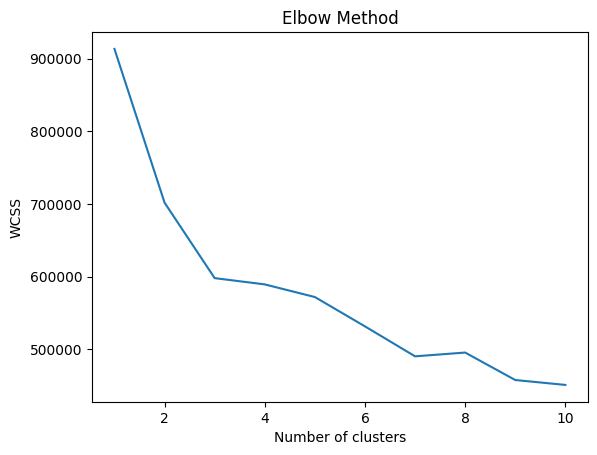

In [14]:
# Plotting the results onto a line graph to observe the 'elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [13]:
# 4. Cluster the data using the optimal K (assuming K=3 for this example)
optimal_k = 3  # Replace this with the K value found from the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(scaled_features)

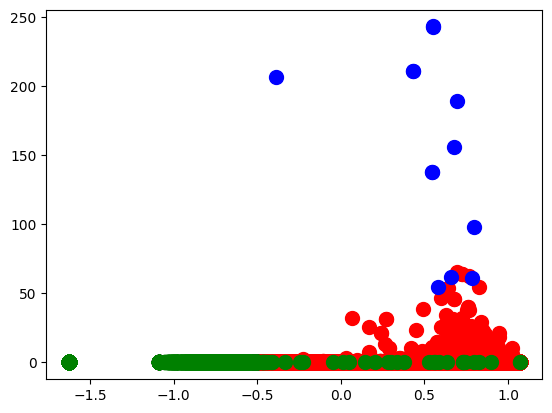

In [14]:
# 5. Plot the clusters
plt.scatter(scaled_features[y_kmeans == 0, 0], scaled_features[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_features[y_kmeans == 1, 0], scaled_features[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_features[y_kmeans == 2, 0], scaled_features[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

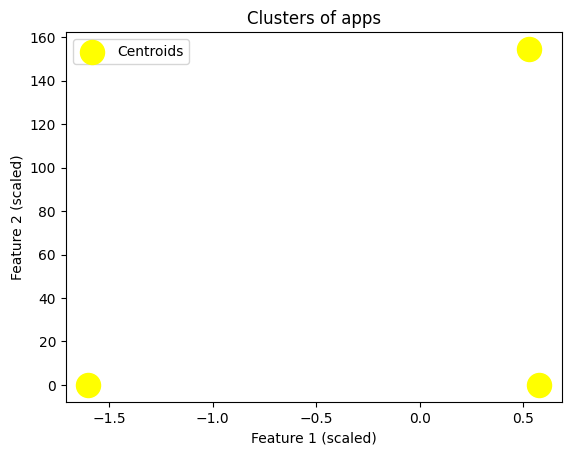

In [15]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of apps')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_9692\446416285.py:10: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Playstore_final.csv")


App Name = Logistics Management = <class 'str'>
App Id = com.eniseistudio.logistics_management = <class 'str'>
Category = Education = <class 'str'>
Rating = 4.090909 = <class 'numpy.float64'>
Rating Count = 66.0 = <class 'numpy.float64'>
Installs = 10,000+ = <class 'str'>
Minimum Installs = 10000.0 = <class 'numpy.float64'>
Free = True = <class 'bool'>
Price = 0.0 = <class 'numpy.float64'>
Currency = USD = <class 'str'>
Size = 5.8M = <class 'str'>
Minimum Android = 4 = <class 'str'>
Developer Id = 4.65645e+18 = <class 'float'>
Developer Website = nan = <class 'float'>
Developer Email = eniseistudio@gmail.com = <class 'str'>
Released = 19-Jul-17 = <class 'str'>
Last update = 19-Jul-17 = <class 'str'>
Privacy Policy = nan = <class 'float'>
Content Rating = Everyone = <class 'str'>
Ad Supported = True = <class 'bool'>
In app purchases = False = <class 'numpy.bool'>
Editor Choice = False = <class 'numpy.bool'>
Summary = Leading Online Learning and Training System in Logistics Management = 

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 41' 'Unnamed: 45' 'Unnamed: 54']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


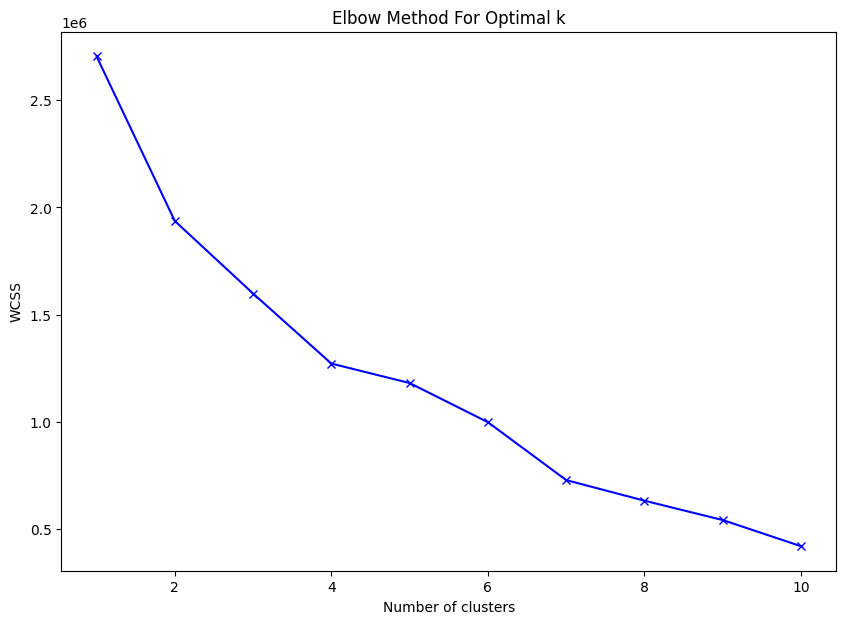

KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

df = pd.read_csv("Playstore_final.csv")
df.describe(include="all")
def show_types(df):
    for col in df.columns:
        print(col, "=", df[col][0], "=", type(df[col][0]))


show_types(df)
for col in df.columns:
    if df[col].dtype != "float64":
        df.drop(col, axis=1, inplace=True)
df.columns

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method result
plt.figure(figsize=(10, 7))
plt.plot(K, wcss, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.show()
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
df["Cluster"] = kmeans.labels_
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

for i in range (k):
    print(f"Cluster{i}")
    print(df["Cluster"].describe)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df["Cluster"]

plt.figure(figsize=(10, 7))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=df_pca)
plt.title("Clusters Visualization with PCA")
plt.show()
# Group the original DataFrame by the cluster labels to inspect each cluster's data
clusters = df.groupby('Cluster')

# Get the summary statistics for each cluster
cluster_summaries = {}
for cluster_num, cluster_data in clusters:
    cluster_summaries[cluster_num] = cluster_data.describe(include='all')

# Print the summary statistics for each cluster
for cluster_num, summary in cluster_summaries.items():
    print(f"Cluster {cluster_num} Summary:")
    print(summary)
    print("\n")